In [30]:
import pandas as pd
import seaborn as sns
from matplotlib import dates


from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [31]:
!wget https://covid.ourworldindata.org/data/ecdc/full_data.csv -O data/full_data.csv

--2020-03-23 21:47:35--  https://covid.ourworldindata.org/data/ecdc/full_data.csv
Resolving covid.ourworldindata.org... 167.172.215.127
Connecting to covid.ourworldindata.org|167.172.215.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186560 (182K) [text/csv]
Saving to: ‘data/full_data.csv’

data/full_data.csv  100%[===================>] 182.19K   404KB/s    in 0.5s    

2020-03-23 21:47:36 (404 KB/s) - ‘data/full_data.csv’ saved [186560/186560]



In [32]:
df = pd.read_csv("data/full_data.csv")


# pd.to_datetime(pd.Series(['05/23/2005']), format="%m/%d/%Y")


df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

# # Filling NaN with 0.
# columns_with_numbers = ['new_cases', "new_deaths", "total_cases", "total_deaths"]
# for column in columns_with_numbers:
#     df[column] = df[column].fillna(0)
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
6447,2020-03-22,Zambia,0,0,2,0
6448,2020-03-23,Zambia,1,0,3,0
6449,2020-03-21,Zimbabwe,1,0,1,0
6450,2020-03-22,Zimbabwe,1,0,2,0


In [33]:
def plot_countrywise_daily(data, country="Turkey", case_type="total_cases"):
    # Remove all the zeros if the case type starting with "total"
    plt.figure(figsize=(20,8))
    country = data[data["location"] == country]
    ax = sns.scatterplot("date", case_type, data=country)
    ax.set(xticks=country.date.values)
    ax.xaxis.set_major_formatter(dates.DateFormatter("%d-%m-%Y"))
    ax.set(xlim=(country["date"].iloc[0], country["date"].iloc[-1])) 
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.show()
    return country

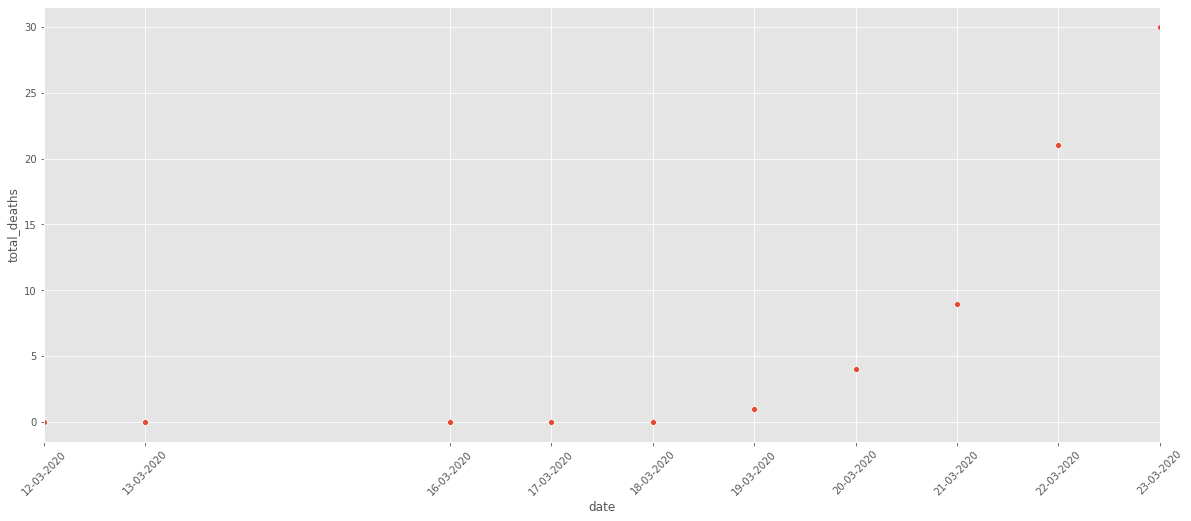

,date,location,new_cases,new_deaths,total_cases,total_deaths
5977,2020-03-12,Turkey,1,0,1,0
5978,2020-03-13,Turkey,1,0,2,0
5979,2020-03-16,Turkey,16,0,18,0
5980,2020-03-17,Turkey,29,0,47,0
5981,2020-03-18,Turkey,51,0,98,0
5982,2020-03-19,Turkey,93,1,191,1
5983,2020-03-20,Turkey,168,3,359,4
5984,2020-03-21,Turkey,311,5,670,9
5985,2020-03-22,Turkey,277,12,947,21
5986,2020-03-23,Turkey,289,9,1236,30


In [35]:
country="Turkey"
column = "total_deaths"
country_df = plot_countrywise_daily(df, country=country, case_type=column)
country_df
# filtered_country_df = country_df[country_df[column] != 0]
# plot_countrywise_daily(filtered_country_df, country=country, case_type=column)